This notebook needs to have the hovernet previously done on the WSIs and just use the results to analysis them.

In [2]:
import warnings
import scipy.io
import json
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
warnings.filterwarnings("ignore")
path_folder = '/nfs/home/users/fshahi/Projects/Datasets/large_ndpis/tiled/'
filenames_5x = os.listdir(path_folder)



Matching the tiles between 20X and 5X

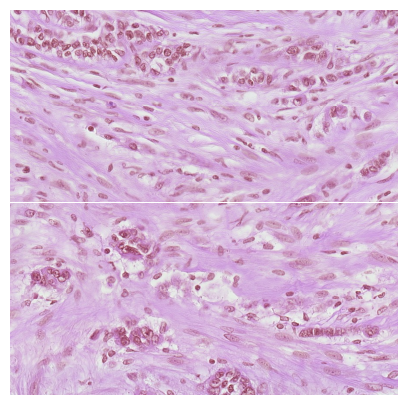

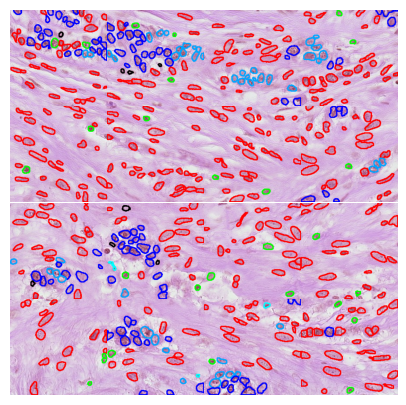

In [190]:
fig1, ax1 = plt.subplots(4,4, figsize=(5,5))
fig2, ax2 = plt.subplots(4,4, figsize=(5,5))

#  make the space between the plots to zero
fig1.subplots_adjust(hspace=0, wspace=0)
fig2.subplots_adjust(hspace=0, wspace=0)

# off the grids
for ax in ax1.flat:
    ax.axis('off')
for ax in ax2.flat:
    ax.axis('off')

i_5x, j_5x = 36,27
start_i, start_j = i_5x*4, j_5x*4


for i in range(start_i, start_i+4):
    for j in range(start_j, start_j+4):
        try:
            folder, format_ = 'overlay', 'png'
            path = '/nfs/home/users/fshahi/Projects/Datasets/large_ndpis/hovernet/MESO_277_6_files/20.0/overlay/{}_{}.png'.format(i,j)
            overlay = cv2.imread(path)

            # load the original image
            path = '/nfs/home/users/fshahi/Projects/Datasets/large_ndpis/tiled/MESO_277_6_files/20.0/{}_{}.jpeg'.format(i, j)
            image = cv2.imread(path)

            i_plot = i-start_i
            j_plot = j-start_j

            ax1[j_plot, i_plot].imshow(image)
            ax2[j_plot, i_plot].imshow(overlay)

        except:
            pass

plt.show()



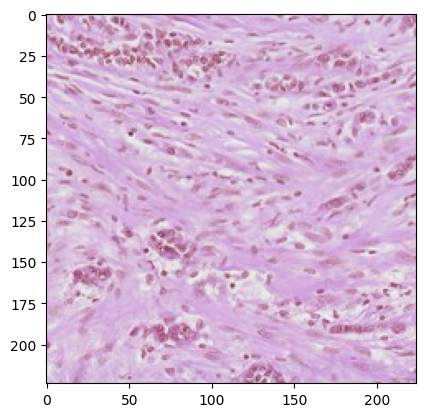

In [192]:
# show the 5x version of the image
path = '/nfs/home/users/fshahi/Projects/Datasets/large_ndpis/tiled/MESO_277_6_files/5.0/{}_{}.jpeg'.format(i_5x, j_5x)
image = cv2.imread(path)
plt.imshow(image)
plt.show()

#### Color Guidence

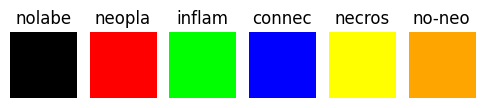

In [121]:
# from: https://github.com/vqdang/hover_net/blob/master/type_info.json
color_dict = {
    "0" : ["nolabe", [0  ,   0,   0]], 
    "1" : ["neopla", [255,   0,   0]], 
    "2" : ["inflam", [0  , 255,   0]], 
    "3" : ["connec", [0  ,   0, 255]], 
    "4" : ["necros", [255, 255,   0]], 
    "5" : ["no-neo", [255, 165,   0]] 
}

fig, ax = plt.subplots(1,6, figsize=(6,1))
for i in range(0,6):
    color = color_dict[str(i)][1]
    label = color_dict[str(i)][0]
    ax[i].imshow(np.array(color).reshape(1,1,3))
    ax[i].set_title(label)
    ax[i].axis('off')
plt.show()


In [201]:
path_folder = '/nfs/home/users/fshahi/Projects/Datasets/large_ndpis/tiled/'
filenames_5x = os.listdir(path_folder)

nuc_types = dict()
for filename in filenames_5x[:1]:
    nuc_types[filename] = dict()
    tiles = os.listdir(path_folder + filename + '/5.0/')
    for tile in tiles[:1]:
        start_i_5x, start_j_5x = tile.split('.jpeg')[0].split('_')
        start_i, start_j = int(start_i_5x)*4, int(start_j_5x)*4
        nuc_types[filename][tile] = dict()
        for i in range(start_i, start_i+4):
            for j in range(start_j, start_j+4):
                try:
                    path = '/nfs/home/users/fshahi/Projects/Datasets/large_ndpis/hovernet/{}/20.0/json/{}_{}.json'.format(filename,i,j)
                    json_file = open(path)
                    data = json.load(json_file)
                    for i_nuc in data['nuc']:
                        type_index = str(data['nuc'][i_nuc]['type'])
                        nuc_type_key = color_dict[type_index][0]
                        nuc_types[filename][tile][nuc_type_key] = nuc_types[filename][tile].get(nuc_type_key, 0) + 1
                except:
                    pass

nuc_types

{'MESO_277_6_files': {'36_27.jpeg': {'neopla': 103,
   'connec': 328,
   'nolabe': 8,
   'inflam': 28,
   'no-neo': 50,
   'necros': 3}}}

In [5]:
path_folder = '/nfs/home/users/fshahi/Projects/Datasets/large_ndpis/tiled/'
filenames_5x = os.listdir(path_folder)

nuc_types_df = pd.DataFrame(columns=['slides', 'tiles', 'necros', 'neopla', 'inflam', 'connec', 'no-neo', 'nolabe'])
for filename in filenames_5x[:-1]:
    tiles = os.listdir(path_folder + filename + '/5.0/')
    for tile in tiles:
        start_i_5x, start_j_5x = tile.split('.jpeg')[0].split('_')
        start_i, start_j = int(start_j_5x)*4, int(start_i_5x)*4
        row = pd.DataFrame([[filename, tile, 0, 0, 0, 0, 0, 0]], columns=['slides', 'tiles', 'necros', 'neopla', 'inflam', 'connec', 'no-neo', 'nolabe'])
        for i in range(start_i, start_i+4):
            for j in range(start_j, start_j+4):
                try:
                    path = '/nfs/home/users/fshahi/Projects/Datasets/large_ndpis/hovernet/{}/20.0/json/{}_{}.json'.format(filename,i,j)
                    json_file = open(path)
                    data = json.load(json_file)
                    for i_nuc in data['nuc']:
                        type_index = str(data['nuc'][i_nuc]['type'])
                        nuc_type_key = color_dict[type_index][0]
                        row[nuc_type_key] = row[nuc_type_key] + 1
                except:
                    pass
        nuc_types_df = pd.concat([nuc_types_df, row], axis=0)


nuc_types_df

In [3]:
# hovernet csv:
nuc_types_df = pd.read_csv('/nfs/home/users/fshahi/Projects/Datasets/large_ndpis/tiled/nuc_types_test.csv')
nuc_types_df


,slides,tiles,necros,neopla,inflam,connec,no-neo,nolabe
0,MESO_277_6_files,36_27.jpeg,16,410,24,229,34,9
1,MESO_277_6_files,18_15.jpeg,5,406,9,200,1,8
2,MESO_277_6_files,14_6.jpeg,0,0,0,0,0,0
3,MESO_277_6_files,16_37.jpeg,14,149,14,310,19,6
4,MESO_277_6_files,40_21.jpeg,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4254,MESO_361_26_files,46_6.jpeg,0,0,0,0,0,0
4255,MESO_361_26_files,26_12.jpeg,76,51,47,133,39,1
4256,MESO_361_26_files,49_42.jpeg,1,2,4,20,0,0
4257,MESO_361_26_files,27_13.jpeg,30,13,17,34,19,0


In [4]:
# fetch clusters
csv = '/nfs/home/users/fshahi/Projects/Histomorphological-Phenotype-Learning/results/BarlowTwins_3/Meso/h224_w224_n3_zdim128/750K/adatas/Meso_he_complete_filtered_metadata_leiden_2p0__fold4.csv'
clusters = pd.read_csv(csv)
clusters = clusters[['tiles', 'leiden_2.0', 'slides']]
clusters['slides'] = clusters['slides'].apply(lambda x: x+'_files') # add _files to the slides to match dictionary
clusters = clusters[clusters['slides'].isin(filenames_5x)] # filter out the slides that are in the dictionary
print('Number of clusters:',clusters['leiden_2.0'].value_counts().shape[0])
print('Number of slides:',clusters['slides'].value_counts().shape[0])

# merge the dataframes
df = nuc_types_df.merge(clusters, on=['slides', 'tiles'], how='inner')

clusters

Number of clusters: 47
Number of slides: 895


,tiles,leiden_2.0,slides
0,48_28.jpeg,12,MESO_340_2_files
1,3_25.jpeg,26,MESO_334_17_files
2,35_8.jpeg,40,MESO_271_4_files
3,49_14.jpeg,11,MESO_244_14_files
4,42_23.jpeg,24,MESO_92_6_files
...,...,...,...
2527427,6_24.jpeg,39,MESO_47_30_files
2527451,10_37.jpeg,35,MESO_92_14_files
2527454,37_41.jpeg,25,MESO_53_16_files
2527457,53_36.jpeg,24,MESO_47_23_files


In [7]:
plotting_dfs = df.groupby('leiden_2.0')

plotting_dfs.groups

{0: [31, 189, 650, 760, 1105, 1261, 1817, 3440, 3443, 3445, 3448, 3453, 3454, 3457, 3462, 3463, 3464, 3484, 3489, 3491, 3493, 3499, 3500, 3504, 3514, 3516, 3517, 3524, 3539, 3540, 3542, 3545, 3546, 3555, 3559, 3576, 3582, 3585, 3588, 3596, 3598, 3599, 3610, 3624, 3625, 3637, 3641, 3642, 3650, 3662, 3664, 3668, 3670, 3671, 3672, 3684, 3686, 3691, 3693, 3697, 3699, 3701, 3713, 3719, 3723, 3728, 3741, 3751, 3752, 3754, 3771, 3779, 3782, 3783, 3787], 1: [364, 389, 1038, 1057, 1522, 2219, 2326, 2580, 2695, 3003, 3051, 3200, 3321, 3323, 3669, 3695, 3847, 3945, 4150], 2: [1459, 3801, 3814, 3884], 3: [480, 3325, 3427, 3623, 3652, 3833, 3854, 3863, 3882, 3887, 3899, 3911, 3928, 3930, 3935, 3937, 3939, 3943, 3959, 3963, 3964, 3968, 3971, 3987, 3993, 4015, 4022, 4023, 4027, 4050, 4058, 4067, 4084, 4092, 4101, 4106, 4114, 4121, 4127, 4137, 4138, 4152], 4: [56, 157, 233, 345, 477, 628, 685, 731, 847, 886, 962, 1099], 5: [3818, 3824, 3905, 3977, 4025, 4029, 4037, 4079, 4081, 4087, 4120], 6: [1230, 1

mean_inflam
mean_necros
mean_connec


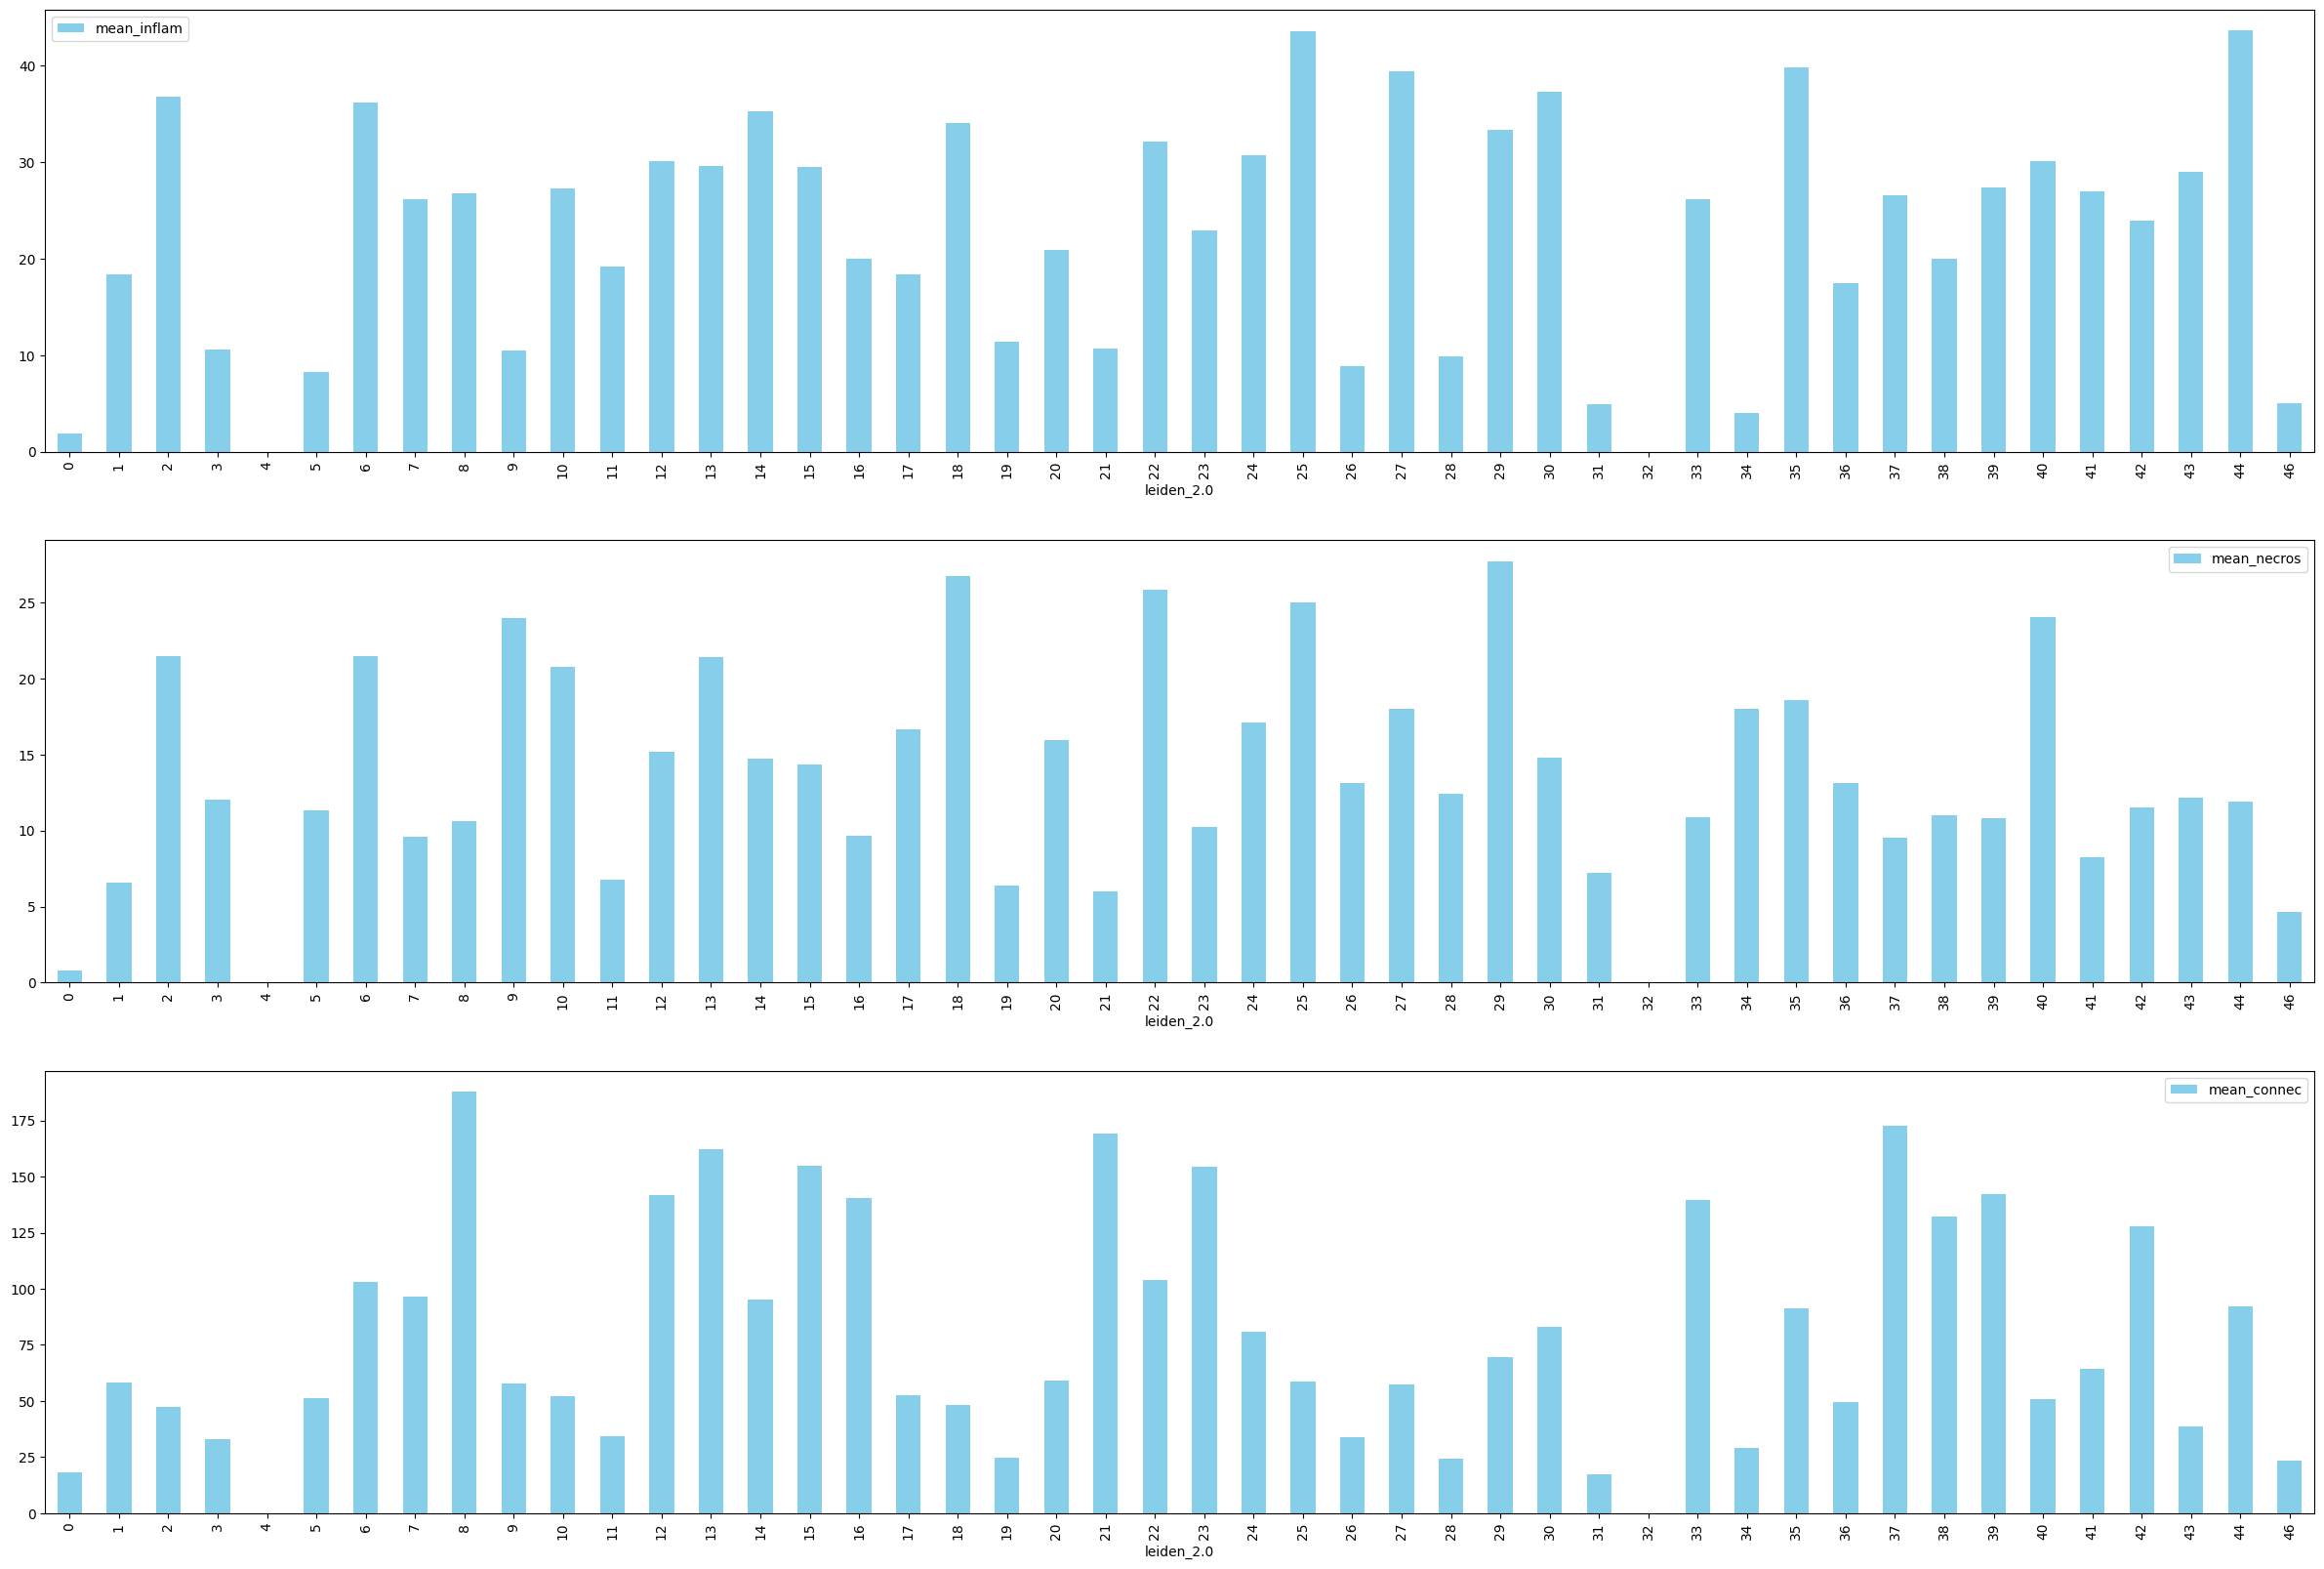

In [5]:
# add dictionary data to the cluster dataframe by tile and slidename

plotting_dfs = df.groupby('leiden_2.0')
# save the number of tiles in each cluster in a list
tiles_per_cluster = [len(plotting_dfs.get_group(i)) for i in plotting_dfs.groups]
plotting_dfs = plotting_dfs.sum()
plotting_dfs['tiles'] = tiles_per_cluster
plotting_dfs['mean_inflam'] = plotting_dfs['inflam']/plotting_dfs['tiles']
plotting_dfs['mean_necros'] = plotting_dfs['necros']/plotting_dfs['tiles']
plotting_dfs['mean_connec'] = plotting_dfs['connec']/plotting_dfs['tiles']
plotting_dfs = plotting_dfs.reset_index()
temp = plotting_dfs[['mean_inflam', 'mean_necros', 'mean_connec', 'leiden_2.0']]


# plotting_dfs = df.groupby('leiden_2.0').sum().drop(columns=['slides', 'tiles']).reset_index()
# plotting_dfs

# plot each column of the dataframe
fig, ax = plt.subplots(3,1, figsize=(30,20))
ax = ax.flatten()
for i, col in enumerate(['mean_inflam', 'mean_necros', 'mean_connec']):
    print(col)
    temp.plot(x='leiden_2.0', y=col, kind='bar', ax=ax[i], color='skyblue')